# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [94]:
import pandas as pd
import pandas as pd
import scipy
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

#### 1. Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

#### Central Limit Theorem 

The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. All this is saying is that as you take more samples, especially large ones, your graph of the sample means will look more like a normal distribution.


In [95]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [97]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
print('Mean is: ', mean, 'Standard Deviation is: ', std )

Mean is:  98.24923076923078 Standard Deviation is:  0.7303577789050377


In [98]:
sample1 = np.random.normal(mean, std, 100000)
sample2 = np.random.normal(mean, std, 130)

In [99]:
def ecdf(data):
      return np.sort(data), np.arange(1, len(data) + 1) / len(data)

In [100]:
x, y = ecdf(df['temperature'])

In [101]:
x_theor, y_theor = ecdf(sample1)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
sns.set()

In [104]:
_ = plt.plot(x_theor, y_theor)

In [105]:
_ = plt.plot(x, y, marker='.', linestyle='none')

In [106]:
_ = plt.xlabel('body temperature (fahrenheit)')

In [107]:
plt.ylabel('CDF')

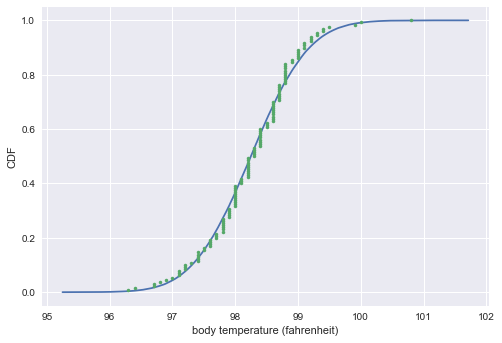

In [108]:
plt.show()

In [109]:
_ = plt.hist(df['temperature'], bins = 12, histtype='step', color='red')
_ = plt.hist(sample2, bins=12, histtype='step', color='blue')

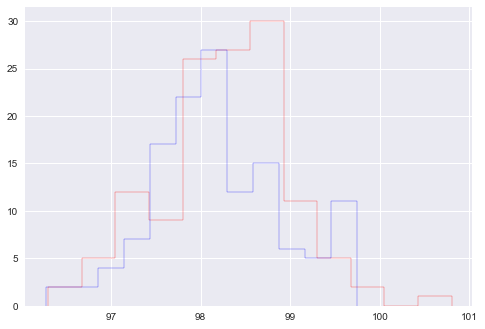

In [110]:
plt.show()

In [111]:
np.sqrt(100000)

316.22776601683796

In [112]:
_ = plt.hist(sample1, bins = 310, histtype='step', color = 'green')

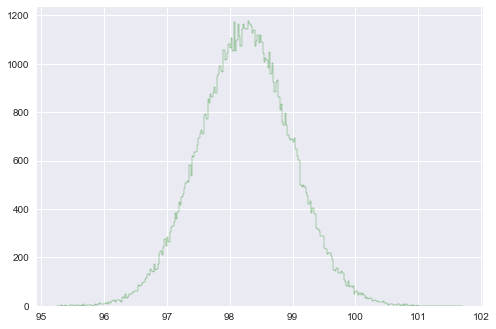

In [113]:
plt.show()

In [114]:
import scipy.stats as stats

In [115]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

#### 1: Solution

The data is normally distributed. All three visualization depict normal distributions and the p value of the normal test is greater then 0.05 which indicates the data has a normal distribution at a significance level of 0.05.

#### 2: Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

#### 2: Solution

The sample size is significantly large given that it is significantly larger than 30. The observations are independent, because one persons body temperature does not impact another person's body temperature.

#### 3: Is the true population mean really 98.6 degrees F?

a) Would you use a one-sample or two-sample test? Why?

b) In this situation, is it appropriate to use the  t  or  z  statistic?

c) Now try using the other test. How is the result be different? Why?

#### 3: Solution

a) You would use a one-sample test, because we are testing a single sample of data

b) It is appropriate to use either a t statistic or a z statistic, because although we do not know the population variance the data has greater then 30 observations making a z statistic also acceptable. 

In [116]:
#Null Hypothesis: 98.6 degrees is the true population mean. The population mean is equal to the sample mean. 
#Alt Hypothesis: 98.6 degrees is not the true population mean. The population mean is not equal to the sample mean. 

In [117]:
# T test
t_05_two_tail = 1.97852448
sampMean = mean
popMean = 98.6
sampStd = std
n = 130

In [118]:
t = (sampMean - popMean) / (sampStd / (np.sqrt(n)))
t

-5.4759252020781162

In [119]:
results = scipy.stats.ttest_1samp(df['temperature'],98.6)
print(results)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [120]:
# P-value lookup from Z value calculator:

# The P-Value is < 0.00001.

#### C)

##### T-Test
The t-test statistic is ~ -5.4759 which is less than the critical t value -1.9785 for an alpha of .05 thus we reject the null hypothesis that 98.6 degrees is the true population mean and accept the alternative that the population mean is not equal equal to 98.6. 

##### Z-Test

The z-test statisitic is also ~ -5.4759. The P-Value associated with this z-statisitic is < 0.00001. Thus at an alpha of .05 we again reject the null hypothesis that 98.6 degrees is the true population mean and accept the alternative that the population mean is not equal equal to 98.6. 

#### 4. Draw a small sample of size 10 from the data and repeat both tests.

a) Which one is the correct one to use?

b) What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [62]:
permuted_data = np.random.permutation(df['temperature'])
permuted_data_10 = permuted_data[10:20]
print(len(permuted_data_10),permuted_data_10)

10 [ 98.4  96.3  98.6  97.8  99.   98.2  98.7  99.2  98.1  97.4]


In [63]:
mean10 = np.mean(permuted_data_10)
std10 = np.std(permuted_data_10)
n10 = 10
print(mean10)
print(std10)

98.17
0.806287789812


In [66]:
t_05_two_tail = 2.262
sampMean10 = mean10
popMean10 = 98.6
sampStd10 = std10

In [67]:
t10 = (sampMean10 - popMean) / (sampStd10 / (np.sqrt(n10)))
t10

-1.6864690387899226

In [70]:
results10 = scipy.stats.ttest_1samp(permuted_data_10,98.6)
results10 = results10
print(results10)

Ttest_1sampResult(statistic=-1.5999250097793036, pvalue=0.14407944643039713)


In [70]:
# Online calculator

#The P-Value is 0.106745.

#The result is not significant at p < 0.05.

In [73]:
#Look up table

#The P-Value is 0.0537 * 2 =
p = 0.0537 * 2
print(p)
#The result is not significant at p < 0.5

0.1074


#### 4: Solution

a) The T test is the correct test to use, because we do not know the variance of the population and the sample size is under 30.

#### b)

#### T-Test

The t-test statistic is -1.6865 which is more than the critical t value of -2.262 for an alpha of .05 thus we fail to reject the null hypothesis that 98.6 degrees is the true population mean.

#### Z-Test

The z-test statisitic is also -1.6865. The P-Value associated with this z-statisitic is 0.1074 so at an alpha of .05 we thus fail to reject the null hypothesis that 98.6 degrees is the true population mean.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

In [82]:
t_05_two_tail = 1.97852448
sampMean = mean
popMean = 98.6
sampStd = std
n = 130
se = sampStd / np.sqrt(n)
me = se * 3
print("standard error is: ", se)
print('margin of error is: ', me)
lower = sampMean - (3*se)
upper = sampMean + (3*se)

print("99.7% confidence interval: ", lower, ", ", upper)

standard error is:  0.0640566146952
margin of error is:  0.192169844086
99.7% confidence interval:  98.0570609251 ,  98.4414006133


##### 5: Solution

The margin of error is 0.19 and the 99.7% confidence interval:  98.0570609251 ,  98.4414006133.

We would consider someone's temperature to be abnormally low at 98.05 and abnormally high at 98.44

#### 6. Is there a significant difference between males and females in normal temperature?

a) What test did you use and why?

b) Write a story with your conclusion in the context of the original problem.

In [72]:
# Null Hypothesis: The difference between males average temperature and females average temperature is 0
# Alternative Hypothesis: The difference between males average temperature and females average temperature is not 0

In [82]:
males = df[df['gender'] == 'M']
males = males['temperature']
females = df[df['gender'] == 'F']
females = females['temperature']

In [83]:
males30 = np.random.permutation(males)[0:30]
females30 = np.random.permutation(females)[0:30]
#combined60 = np.concatenate((males30, females30))
print(males30)
print(females30)

[ 98.   97.8  97.7  98.2  98.2  97.4  98.5  98.6  98.6  96.7  98.8  98.2
  98.4  99.5  98.6  98.6  97.2  97.6  97.5  98.   97.4  97.6  98.4  99.
  97.9  97.1  97.8  97.4  99.1  96.3]
[ 100.    99.4   97.8   98.7   98.6   97.2   98.8   98.4   98.4   98.2
   98.3   96.7   98.    98.    98.6   99.2   98.8   98.7   98.8   98.3
   99.1   97.9   98.4   98.8   98.6   98.6   98.    98.3   99.1   98.7]


In [84]:
differences30 = males30 - females30
differences30

array([-2. , -1.6, -0.1, -0.5, -0.4,  0.2, -0.3,  0.2,  0.2, -1.5,  0.5,
        1.5,  0.4,  1.5,  0. , -0.6, -1.6, -1.1, -1.3, -0.3, -1.7, -0.3,
        0. ,  0.2, -0.7, -1.5, -0.2, -0.9,  0. , -2.4])

In [85]:
diffMean = np.mean(differences30)
diffStd = np.std(differences30)
ste = diffStd / (np.sqrt(30))
print("Mean differences is: ", diffMean, "Standard deviation of differences is: ", diffStd, 
     "standard error of differences is: ", ste)

Mean differences is:  -0.476666666667 Standard deviation of differences is:  0.927607436126 standard error of differences is:  0.169357172425


In [87]:
t_05_two_tail = 2.045
df = 29

In [121]:
t = (diffMean - 0) / ste

In [89]:
t 

-2.8145643898090875

#### 6 Solution

a) Pair sample T test

b) The t statisitic is -2.8146 which falls outside the acceptance region of -2.045 to 2.045, thus we reject the null hypothesis and accept the alternate hypothesis that the mean difference of male and female body temperature is different with a significance of level of 0.05.